In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
# import dataset
df = pd.read_csv("../HackathonData//Train_Combined/train_combined_Species.csv", sep = ',')

In [13]:
# Drop the index column
df.drop(df.columns[0], axis=1, inplace=True)

In [14]:
# Selecting features X and target Y
X = df.drop("label", axis=1)
y = df["label"]

In [15]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Create a pipeline that first performs feature scaling, PCA, and feature selection, and then trains a Random Forest Classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=10)),
    ('feature_selection', SelectKBest(f_classif, k=5)),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=1000))
])

In [17]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=10)),
                ('feature_selection', SelectKBest(k=5)),
                ('classifier',
                 RandomForestClassifier(n_estimators=1000, random_state=42))])

In [18]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [19]:
# Evaluate the performance of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4752475247524752


In [20]:
# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.59      0.55        95
           1       0.44      0.48      0.46        81
           2       0.50      0.06      0.11        17
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6

    accuracy                           0.48       202
   macro avg       0.29      0.23      0.22       202
weighted avg       0.46      0.48      0.45       202



/Users/dt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

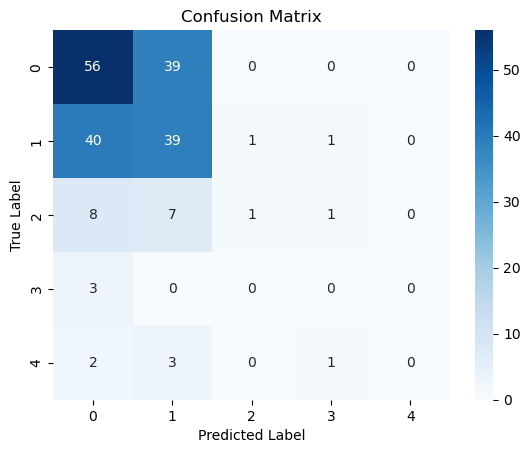

In [22]:
# Plot the confusion matrix
confusion_matrix_ = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()